In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

In [3]:
def convert_image_to_tensor(path):
    #opens image from the given path and automatically comes in array format
    img = Image.open(path).convert("RGB")
    # rescale to 256 x 256 size
    img = img.resize([128,128])
    #convert to numpy array
    img = np.asarray(img, dtype=np.float32)/255.0
    return img

In [4]:
images_list = []
labels_list = []
labels_map = {}
label_val = 0
base_dir = 'data'
for folder in os.listdir(base_dir):
    labels_map[label_val] = folder
    for file in os.listdir(base_dir+'/'+folder):
        images_list.append(base_dir+'/'+folder+'/'+file)
        labels_list.append(label_val)
    label_val +=1

In [5]:
layers = tf.keras.layers.CategoryEncoding(num_tokens=len(list(set(labels_list))), output_mode="one_hot")
labels_list = np.array(layers(labels_list))
images_list = np.array([convert_image_to_tensor(i) for i in images_list])

d:\fnclick\python\ml\dog-cat-identification\env\Lib\site-packages\PIL\TiffImagePlugin.py:935: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [25]:
x, xtest, y, ytest = train_test_split(images_list, labels_list, test_size=0.2, random_state=42)

In [26]:
xvalidate, xtest, yvalidate, ytest = train_test_split(xtest, ytest, test_size=0.5, random_state=42)

In [28]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization, MaxPooling2D
from keras import Sequential

In [35]:
from keras import regularizers

In [36]:
model = Sequential()
model.add(Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
    input_shape=(128,128,3)
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))
# model.add(Conv2D(
#     filters = 64,
#     kernel_size = (3,3),
#     activation=tf.keras.activations.relu,
# ))
# model.add(MaxPooling2D(
#     pool_size=(2, 2),
#     strides = 2,
# ))
model.add(Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation=tf.keras.activations.relu,
))
model.add(MaxPooling2D(
    pool_size=(2, 2),
    strides = 2,
))

model.add(Flatten())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
    kernel_regularizer=regularizers.l1(0.01)
))
model.add(BatchNormalization())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
    kernel_regularizer=regularizers.l1(0.01)
))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(
    units = 512,
    activation = tf.keras.activations.relu,
    kernel_regularizer=regularizers.l1(0.01)
))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(
    units = 2,
    activation = tf.keras.activations.softmax
))

d:\fnclick\python\ml\dog-cat-identification\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 512)            │     6,423,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,011,842 (26.75 MB)

 Trainable params: 7,008,770 (26.74 MB)

 Non-trainable params: 3,072 (12.00 KB)

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
res = model.fit(x, y, epochs=10, validation_data=(xvalidate, yvalidate))

Epoch 1/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 96s 145ms/step - accuracy: 0.5504 - loss: 112.1734 - val_accuracy: 0.6206 - val_loss: 8.4340
Epoch 2/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 83s 133ms/step - accuracy: 0.6943 - loss: 8.4060 - val_accuracy: 0.6334 - val_loss: 8.6296
Epoch 3/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.7532 - loss: 8.4152 - val_accuracy: 0.5224 - val_loss: 9.0721
Epoch 4/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 76s 122ms/step - accuracy: 0.7826 - loss: 8.4233 - val_accuracy: 0.6158 - val_loss: 8.6276
Epoch 5/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.8008 - loss: 8.4018 - val_accuracy: 0.8161 - val_loss: 8.3533
Epoch 6/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.8173 - loss: 8.3480 - val_accuracy: 0.7244 - val_loss: 8.5386
Epoch 7/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 131ms/step - accuracy: 0.8163 - loss: 8.4322 - val_accuracy: 0.8117 - val_loss: 8.3328
Epoch 8/10
624/624 ━━━━━━━━━━━━━━━━━━━━ 82s 132ms/step - accuracy: 0.8308 - loss:

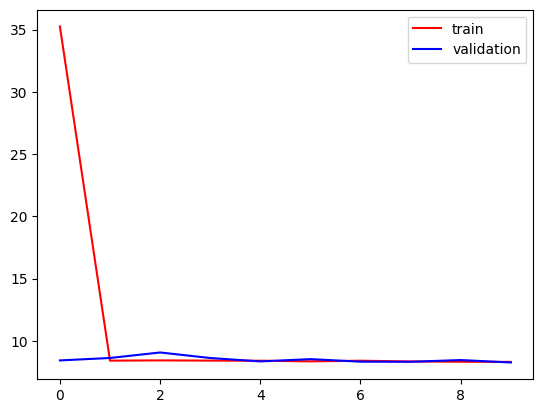

In [40]:
plt.plot(res.history['loss'],color='red',label='train')
plt.plot(res.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [42]:
display(xtest)

array([[[[0.5294118 , 0.50980395, 0.42352942],
         [0.53333336, 0.5137255 , 0.42745098],
         [0.54509807, 0.52156866, 0.43529412],
         ...,
         [0.32941177, 0.29411766, 0.18039216],
         [0.24313726, 0.2       , 0.11372549],
         [0.18039216, 0.13725491, 0.06666667]],

        [[0.54509807, 0.5254902 , 0.44313726],
         [0.5529412 , 0.53333336, 0.4509804 ],
         [0.5686275 , 0.5411765 , 0.4627451 ],
         ...,
         [0.3254902 , 0.2901961 , 0.17254902],
         [0.30588236, 0.2627451 , 0.17254902],
         [0.23529412, 0.19215687, 0.11764706]],

        [[0.5529412 , 0.53333336, 0.45490196],
         [0.56078434, 0.5411765 , 0.4627451 ],
         [0.57254905, 0.54509807, 0.47058824],
         ...,
         [0.3529412 , 0.3137255 , 0.19607843],
         [0.34901962, 0.30980393, 0.21176471],
         [0.30588236, 0.25882354, 0.18039216]],

        ...,

        [[0.972549  , 0.972549  , 0.972549  ],
         [0.9647059 , 0.9647059 , 0.9647059 ]

In [43]:
results = model.evaluate(xtest, ytest, batch_size=128)

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - accuracy: 0.8240 - loss: 8.3051


In [45]:
print(results)

[8.28920841217041, 0.8297275900840759]


In [52]:
predictions = model.predict(xtest[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


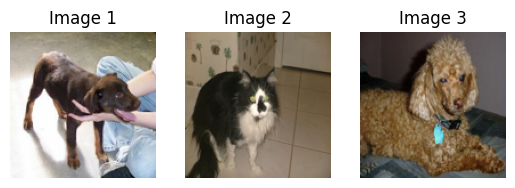

In [53]:
for i in range(3):
    plt.subplot(1, 3, i + 1)  # Create a subplot for each image
    plt.imshow(xtest[i], cmap='gray')  # Use cmap='gray' if the images are grayscale
    plt.axis('off')  # Hide the axes for better visualization
    plt.title(f"Image {i+1}")

plt.show()

In [61]:
print(predictions)
i = 0
for x in predictions:
    x = list(x)
    print(labels_map[x.index(max(x))])
    i+=1

[[0.00256442 0.9974356 ]
 [0.82763296 0.172367  ]
 [0.3405202  0.6594798 ]]
Dog
Cat
Dog
